In [3]:
import pandas as pd
df_a = pd.read_csv("/kaggle/input/heartbeat-sounds/set_a.csv")
df_b = pd.read_csv("/kaggle/input/heartbeat-sounds/set_b.csv")

## there are two meta datas in this dataset describing set_a and set_b we firstly try to load these data and then merge them into a single data

In [4]:
df_a.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [5]:
df_b.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [63]:
df_b['label'].unique()

array(['normal', 'murmur', 'extrastole'], dtype=object)

## by checking the paths provided by df_b we could observe that the paths were false so we tried to create a new data frame from the actua audio files in the set b and extract their labels from their corresponding names.

In [7]:
import os
import pandas as pd

# Define input directory
input_dir = "/kaggle/input/heartbeat-sounds/set_b"  # Replace with your actual directory path

# Define the keywords for labels
keywords = ['extrastole', 'murmur', 'normal']

# List to store data
data = []

# Iterate through files in the directory
for root, _, files in os.walk(input_dir):
    for file in files:
        if file.endswith(('.wav')):  # Check for audio files
            label = next((keyword for keyword in keywords if keyword in file.lower()), None)
            if label:  # Only include files with a matching label
                file_path = os.path.join(root, file)
                data.append({'fname': file_path, 'label': label})

df_b = pd.DataFrame(data)
df_b

,fname,label
0,/kaggle/input/heartbeat-sounds/set_b/normal__2...,normal
1,/kaggle/input/heartbeat-sounds/set_b/normal_no...,normal
2,/kaggle/input/heartbeat-sounds/set_b/murmur__1...,murmur
3,/kaggle/input/heartbeat-sounds/set_b/normal__2...,normal
4,/kaggle/input/heartbeat-sounds/set_b/murmur__2...,murmur
...,...,...
456,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal
457,/kaggle/input/heartbeat-sounds/set_b/murmur__2...,murmur
458,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal
459,/kaggle/input/heartbeat-sounds/set_b/normal_no...,normal


## the cell above is implementing our goal which is extracting the set b audio's and labels from the actual dataset

In [8]:
prefix = "/kaggle/input/heartbeat-sounds/"
df_a['fname'] = prefix + df_a['fname']

## for simplicity we added prefix of the paths to set a df['fname'] paths

In [9]:
df = pd.concat([df_a, df_b], ignore_index=True)
df

,dataset,fname,label,sublabel
0,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN
1,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN
2,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN
3,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN
4,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN
...,...,...,...,...
632,NaN,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal,NaN
633,NaN,/kaggle/input/heartbeat-sounds/set_b/murmur__2...,murmur,NaN
634,NaN,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal,NaN
635,NaN,/kaggle/input/heartbeat-sounds/set_b/normal_no...,normal,NaN


In [10]:
df.isnull().sum()

dataset     461
fname         0
label        52
sublabel    637
dtype: int64

## the only columns which matter to our purposes are fname and label so we have missing values only for label column but since filling missing values are risky for audio data and the number of missing values are not as significant we can simply remove them instead of imputation methods.

In [11]:
df.shape

(637, 4)

In [12]:
df['label'].unique()

array(['artifact', 'extrahls', 'murmur', 'normal', nan, 'extrastole'],
      dtype=object)

In [13]:
df['sublabel'].unique()

array([nan])

In [14]:

missing_label = df[df['label'].isna()]
missing_both = missing_label[missing_label['sublabel'].isna()]
count_missing_both = len(missing_both)
print(f"{count_missing_both} out of {len(missing_label)} rows with missing labels also have missing sublabels.")

52 out of 52 rows with missing labels also have missing sublabels.


## we checked if for missing labels there were any sublabels available so we could we could impute with them instead but there were none so we hd to stick with removing sa well

In [15]:
df = df[df['label'].notna()]

## now our data is clean and we have 637 data samples

# Distribution plot

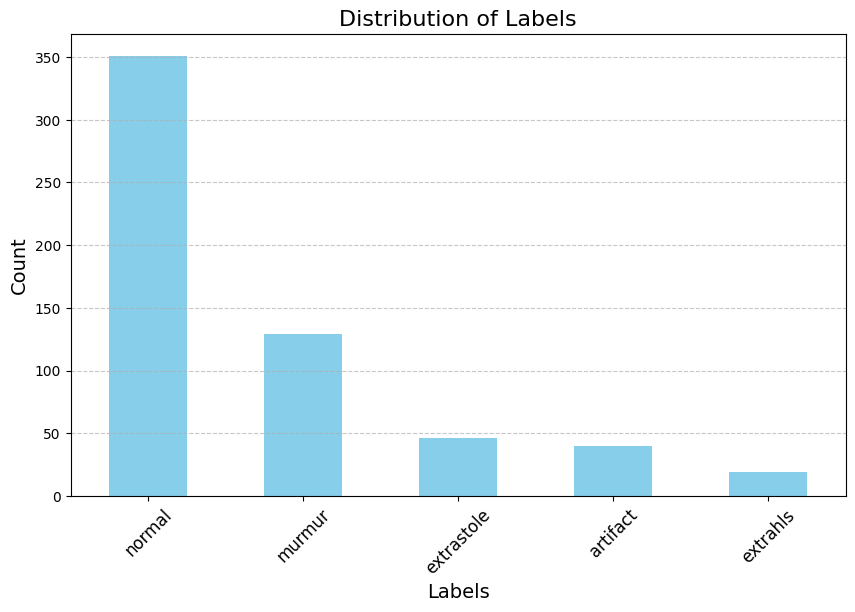

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
label_counts = df['label'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## from  the given distribution plot above it is evident that the classes are not balanced and they may need resampling methods, first we train out model like this and if the results were not satisfying then our first option could be resampling methods to improve the performance of the models. 

# univariate data sample analysis

In [16]:
from scipy.io import wavfile
rate, data = wavfile.read(df['fname'][0])
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  44100
Total samples (frames) =  (396900,)
[ 1 -3 -1 ...  0  1  0]


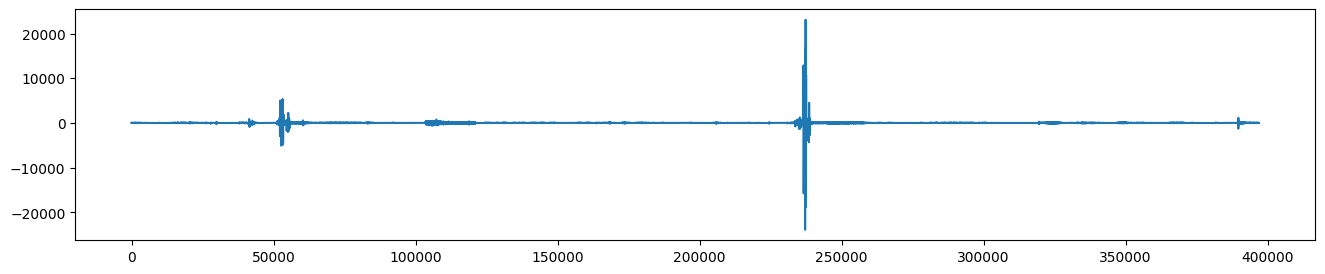

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3))
plt.plot(data, '-', );

In [22]:
import IPython.display as ipd
sample_file = df['fname'][0]
sampling_rate = 16000 
ipd.Audio(data=sample_file, rate=sampling_rate)

In [60]:
df

,dataset,fname,label,sublabel
0,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN
1,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN
2,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN
3,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN
4,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN
...,...,...,...,...
632,NaN,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal,NaN
633,NaN,/kaggle/input/heartbeat-sounds/set_b/murmur__2...,murmur,NaN
634,NaN,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal,NaN
635,NaN,/kaggle/input/heartbeat-sounds/set_b/normal_no...,normal,NaN


# data audio files in this dataset don't have the same length so we have to make them. we can acheive this goal by only keeping the first 5 seconds of each audio and for those with length less than 5 seconds we can pad them with silence audio. the process is implemented in thee code below

In [17]:
from pydub import AudioSegment
import pandas as pd
import os

target_duration = 5000  # 5 seconds
output_dir = "/kaggle/working/processed_audio/"
os.makedirs(output_dir, exist_ok=True)

def process_audio(file_path):
    try:
        audio = AudioSegment.from_file(file_path)
        duration = len(audio)
        if duration > target_duration:
            processed_audio = audio[:target_duration]
        else:
            silence = AudioSegment.silent(duration=target_duration - duration)
            processed_audio = audio + silence
        file_name = os.path.basename(file_path).replace('.wav', '_processed.wav')
        processed_path = os.path.join(output_dir, file_name)
        processed_audio.export(processed_path, format="wav")
        return processed_path 
        
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

df['processed_fname'] = df['fname'].apply(process_audio)
df

<ipython-input-17-d74be646bea7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_fname'] = df['fname'].apply(process_audio)


,dataset,fname,label,sublabel,processed_fname
0,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN,/kaggle/working/processed_audio/artifact__2010...
1,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN,/kaggle/working/processed_audio/artifact__2011...
2,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN,/kaggle/working/processed_audio/artifact__2011...
3,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN,/kaggle/working/processed_audio/artifact__2011...
4,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN,/kaggle/working/processed_audio/artifact__2011...
...,...,...,...,...,...
632,NaN,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal,NaN,/kaggle/working/processed_audio/normal__152_13...
633,NaN,/kaggle/input/heartbeat-sounds/set_b/murmur__2...,murmur,NaN,/kaggle/working/processed_audio/murmur__292_13...
634,NaN,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal,NaN,/kaggle/working/processed_audio/normal__190_13...
635,NaN,/kaggle/input/heartbeat-sounds/set_b/normal_no...,normal,NaN,/kaggle/working/processed_audio/normal_noisyno...


# we should also appy a feature extraction method for signals where in here we chose mfcc to create spectral features from the signal. this process involves:  
### Preprocessing: Divide audio into frames and apply a Fourier transform.
### Mel Scale Mapping: Convert frequencies to the Mel scale to mimic human auditory perception.
### Cepstrum Calculation: Apply a logarithm and Discrete Cosine Transform (DCT) to decorrelate features, producing the MFCCs.

In [18]:
import librosa
import numpy as np
def extract_mfcc(file_path, n_mfcc=13, max_length=50):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        if mfcc.shape[1] < max_length:
            mfcc = np.pad(mfcc, ((0, 0), (0, max_length - mfcc.shape[1])), mode='constant')
        else:
            mfcc = mfcc[:, :max_length]
        return mfcc.flatten()
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


df['mfcc'] = df['processed_fname'].apply(lambda x: extract_mfcc(x))
# df = df.dropna(subset=['mfcc'])
df

<ipython-input-18-e3bb276051d9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mfcc'] = df['processed_fname'].apply(lambda x: extract_mfcc(x))


,dataset,fname,label,sublabel,processed_fname,mfcc
0,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN,/kaggle/working/processed_audio/artifact__2010...,"[-688.99664, -663.55835, -640.84564, -633.3758..."
1,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN,/kaggle/working/processed_audio/artifact__2011...,"[-1016.1604, -1004.75507, -1003.5152, -1002.86..."
2,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN,/kaggle/working/processed_audio/artifact__2011...,"[-684.5422, -639.35565, -635.58044, -633.2466,..."
3,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN,/kaggle/working/processed_audio/artifact__2011...,"[-387.551, -356.36316, -347.1199, -290.89523, ..."
4,a,/kaggle/input/heartbeat-sounds/set_a/artifact_...,artifact,NaN,/kaggle/working/processed_audio/artifact__2011...,"[-359.7388, -333.17215, -341.2132, -336.26926,..."
...,...,...,...,...,...,...
632,NaN,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal,NaN,/kaggle/working/processed_audio/normal__152_13...,"[-253.46248, -216.19695, -166.33803, -150.9645..."
633,NaN,/kaggle/input/heartbeat-sounds/set_b/murmur__2...,murmur,NaN,/kaggle/working/processed_audio/murmur__292_13...,"[-320.5581, -237.79312, -207.54936, -197.82721..."
634,NaN,/kaggle/input/heartbeat-sounds/set_b/normal__1...,normal,NaN,/kaggle/working/processed_audio/normal__190_13...,"[-382.77686, -359.1721, -326.03915, -314.40488..."
635,NaN,/kaggle/input/heartbeat-sounds/set_b/normal_no...,normal,NaN,/kaggle/working/processed_audio/normal_noisyno...,"[-200.27477, -176.93462, -238.2168, -227.58743..."


# model creation and training

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### data should be encoded in here we chose label encoding

In [20]:
X = np.array(df['mfcc'].tolist())  # Convert MFCCs to a 3D array
y = df['label'].values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = np.eye(len(label_encoder.classes_))[y_encoded] 

In [21]:
n_mfcc = 13
max_length = 50
X_reshaped = X.reshape(X.shape[0], n_mfcc, max_length) 
X_tensor = torch.tensor(X_reshaped, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_tensor = torch.tensor(y_onehot, dtype=torch.float32)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [22]:
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

## the code below is implementing a class where dynamically different models such as rnn, lstm, bi-lstm, x-lstm and gru are initialized

In [49]:
import torch
import torch.nn as nn

class RNNModel(nn.Module):
    def __init__(self, input_channels, num_classes, model_type='LSTM'):
        super(RNNModel, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Validate model_type and initialize RNN
        self.model_type = model_type
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(64, 64, batch_first=True, dropout=0.3)
            self.fc = nn.Linear(64, num_classes)
        elif model_type == 'BiLSTM':
            self.rnn = nn.LSTM(64, 64, batch_first=True, dropout=0.3, bidirectional=True)
            self.fc = nn.Linear(128, num_classes)  # BiLSTM doubles the feature size
        elif model_type == 'xLSTM':
            self.rnn = nn.LSTM(64, 128, num_layers=2, batch_first=True, dropout=0.3)  # Extended LSTM with more layers
            self.fc = nn.Linear(128, num_classes)  # Adjust to match xLSTM's 128 output features
        elif model_type == 'GRU':
            self.rnn = nn.GRU(64, 64, batch_first=True, dropout=0.3)
            self.fc = nn.Linear(64, num_classes)
        elif model_type == 'RNN':  # Simple RNN
            self.rnn = nn.RNN(64, 64, batch_first=True, dropout=0.3)
            self.fc = nn.Linear(64, num_classes)
        else:
            raise ValueError(f"Unsupported model_type: {model_type}")

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1, 64) 
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :]) 
        return x


## the architecture is as below

- CNN Layers:
The model begins with two convolutional layers to extract spatial features from the input data.
Layer 1: A 2D convolution with 32 filters, kernel size 3, and ReLU activation followed by a max-pooling layer (2x2).
Layer 2: A 2D convolution with 64 filters, kernel size 3, and ReLU activation followed by another max-pooling layer (2x2).

- Recurrent Layers:
LSTM: A standard LSTM layer with 64 hidden units.
BiLSTM : A bidirectional LSTM with 64 hidden units in each direction (128 combined features).
xLSTM : A two-layer LSTM with 128 hidden units for enhanced modeling capacity.
GRU : A GRU layer with 64 hidden units, offering a simpler alternative to LSTM.
Simple RNN: A basic RNN layer with 64 hidden units.

- Fully Connected Layer

In [65]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, multilabel_confusion_matrix

def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs=100):
    # Train the model
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            predicted = torch.round(torch.sigmoid(outputs))
            correct += (predicted == labels).sum().item()
            total += labels.numel()
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct / total 
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = torch.round(torch.sigmoid(outputs)) 
            correct += (predicted == labels).sum().item()
            total += labels.numel()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    test_accuracy = correct / total
    precision = precision_score(all_labels, all_predictions, average='micro') 
    recall = recall_score(all_labels, all_predictions, average='micro')  
    cm = multilabel_confusion_matrix(all_labels, all_predictions)

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix (per label):")
    print(cm)

    return test_accuracy, precision, recall, cm


In [67]:
model_types = ['LSTM', 'BiLSTM', 'GRU', 'xLSTM']

# Training and evaluation loop for all models
for model_type in model_types:
    print(f"\nTraining and evaluating {model_type} model...")
    model = RNNModel(input_channels=1, num_classes=y_onehot.shape[1], model_type=model_type)
    
    # Loss and optimizer
    criterion = nn.BCEWithLogitsLoss()  # For multi-label classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train and evaluate the model
    test_accuracy, precision, recall, cm = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs=100)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model


Training and evaluating LSTM model...


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/100, Loss: 0.5398, Accuracy: 0.7863
Epoch 2/100, Loss: 0.3920, Accuracy: 0.8513
Epoch 3/100, Loss: 0.3614, Accuracy: 0.8530
Epoch 4/100, Loss: 0.3489, Accuracy: 0.8594
Epoch 5/100, Loss: 0.3435, Accuracy: 0.8594
Epoch 6/100, Loss: 0.3341, Accuracy: 0.8624
Epoch 7/100, Loss: 0.3272, Accuracy: 0.8650
Epoch 8/100, Loss: 0.3239, Accuracy: 0.8675
Epoch 9/100, Loss: 0.3126, Accuracy: 0.8709
Epoch 10/100, Loss: 0.3054, Accuracy: 0.8705
Epoch 11/100, Loss: 0.3059, Accuracy: 0.8718
Epoch 12/100, Loss: 0.3028, Accuracy: 0.8709
Epoch 13/100, Loss: 0.2966, Accuracy: 0.8769
Epoch 14/100, Loss: 0.2932, Accuracy: 0.8714
Epoch 15/100, Loss: 0.2898, Accuracy: 0.8803
Epoch 16/100, Loss: 0.2888, Accuracy: 0.8812
Epoch 17/100, Loss: 0.2813, Accuracy: 0.8842
Epoch 18/100, Loss: 0.2786, Accuracy: 0.8897
Epoch 19/100, Loss: 0.2827, Accuracy: 0.8876
Epoch 20/100, Loss: 0.2764, Accuracy: 0.8953
Epoch 21/100, Loss: 0.2721, Accuracy: 0.8957
Epoch 22/100, Loss: 0.2700, Accuracy: 0.8957
Epoch 23/100, Loss:

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/100, Loss: 0.5432, Accuracy: 0.7688
Epoch 2/100, Loss: 0.3919, Accuracy: 0.8496
Epoch 3/100, Loss: 0.3615, Accuracy: 0.8504
Epoch 4/100, Loss: 0.3474, Accuracy: 0.8573
Epoch 5/100, Loss: 0.3420, Accuracy: 0.8654
Epoch 6/100, Loss: 0.3351, Accuracy: 0.8632
Epoch 7/100, Loss: 0.3325, Accuracy: 0.8615
Epoch 8/100, Loss: 0.3283, Accuracy: 0.8645
Epoch 9/100, Loss: 0.3219, Accuracy: 0.8645
Epoch 10/100, Loss: 0.3198, Accuracy: 0.8654
Epoch 11/100, Loss: 0.3136, Accuracy: 0.8641
Epoch 12/100, Loss: 0.3068, Accuracy: 0.8654
Epoch 13/100, Loss: 0.3109, Accuracy: 0.8654
Epoch 14/100, Loss: 0.3087, Accuracy: 0.8641
Epoch 15/100, Loss: 0.2961, Accuracy: 0.8748
Epoch 16/100, Loss: 0.2941, Accuracy: 0.8765
Epoch 17/100, Loss: 0.2861, Accuracy: 0.8829
Epoch 18/100, Loss: 0.2848, Accuracy: 0.8833
Epoch 19/100, Loss: 0.2815, Accuracy: 0.8859
Epoch 20/100, Loss: 0.2796, Accuracy: 0.8876
Epoch 21/100, Loss: 0.2725, Accuracy: 0.8906
Epoch 22/100, Loss: 0.2700, Accuracy: 0.8940
Epoch 23/100, Loss:

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/100, Loss: 0.4827, Accuracy: 0.8132
Epoch 2/100, Loss: 0.3593, Accuracy: 0.8568
Epoch 3/100, Loss: 0.3431, Accuracy: 0.8585
Epoch 4/100, Loss: 0.3403, Accuracy: 0.8607
Epoch 5/100, Loss: 0.3282, Accuracy: 0.8654
Epoch 6/100, Loss: 0.3194, Accuracy: 0.8654
Epoch 7/100, Loss: 0.3141, Accuracy: 0.8654
Epoch 8/100, Loss: 0.3065, Accuracy: 0.8675
Epoch 9/100, Loss: 0.3035, Accuracy: 0.8748
Epoch 10/100, Loss: 0.2999, Accuracy: 0.8765
Epoch 11/100, Loss: 0.2931, Accuracy: 0.8803
Epoch 12/100, Loss: 0.2882, Accuracy: 0.8859
Epoch 13/100, Loss: 0.2807, Accuracy: 0.8893
Epoch 14/100, Loss: 0.2781, Accuracy: 0.8915
Epoch 15/100, Loss: 0.2710, Accuracy: 0.8932
Epoch 16/100, Loss: 0.2675, Accuracy: 0.8991
Epoch 17/100, Loss: 0.2645, Accuracy: 0.8923
Epoch 18/100, Loss: 0.2638, Accuracy: 0.8953
Epoch 19/100, Loss: 0.2625, Accuracy: 0.8957
Epoch 20/100, Loss: 0.2569, Accuracy: 0.8957
Epoch 21/100, Loss: 0.2488, Accuracy: 0.9038
Epoch 22/100, Loss: 0.2495, Accuracy: 0.9013
Epoch 23/100, Loss:

In [70]:
print(f"\nTraining and evaluating RNN")
model = RNNModel(input_channels=1, num_classes=y_onehot.shape[1], model_type="RNN")
criterion = nn.BCEWithLogitsLoss()  # For multi-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)
test_accuracy, precision, recall, cm = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs=100)



Training and evaluating RNN
Epoch 1/100, Loss: 0.4961, Accuracy: 0.8060
Epoch 2/100, Loss: 0.3739, Accuracy: 0.8521
Epoch 3/100, Loss: 0.3614, Accuracy: 0.8538
Epoch 4/100, Loss: 0.3527, Accuracy: 0.8577
Epoch 5/100, Loss: 0.3451, Accuracy: 0.8607
Epoch 6/100, Loss: 0.3426, Accuracy: 0.8611
Epoch 7/100, Loss: 0.3361, Accuracy: 0.8624
Epoch 8/100, Loss: 0.3319, Accuracy: 0.8658
Epoch 9/100, Loss: 0.3186, Accuracy: 0.8731
Epoch 10/100, Loss: 0.3183, Accuracy: 0.8705
Epoch 11/100, Loss: 0.3087, Accuracy: 0.8761
Epoch 12/100, Loss: 0.3059, Accuracy: 0.8791
Epoch 13/100, Loss: 0.2968, Accuracy: 0.8842
Epoch 14/100, Loss: 0.2890, Accuracy: 0.8855
Epoch 15/100, Loss: 0.2859, Accuracy: 0.8893
Epoch 16/100, Loss: 0.2771, Accuracy: 0.8897
Epoch 17/100, Loss: 0.2718, Accuracy: 0.8944
Epoch 18/100, Loss: 0.2740, Accuracy: 0.8902
Epoch 19/100, Loss: 0.2713, Accuracy: 0.8936
Epoch 20/100, Loss: 0.2629, Accuracy: 0.8936
Epoch 21/100, Loss: 0.2585, Accuracy: 0.8940
Epoch 22/100, Loss: 0.2521, Accurac

In [71]:
import torch
import torch.nn as nn
import torchvision.models as models

class RNNModel(nn.Module):
    def __init__(self, input_channels, num_classes, model_type='LSTM'):
        super(RNNModel, self).__init__()
        
        # Pretrained ResNet as the feature extractor
        resnet = models.resnet18(pretrained=True)  # Load a pretrained ResNet18
        if input_channels != 3:
            # Modify the first convolutional layer to match input_channels
            resnet.conv1 = nn.Conv2d(input_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])  # Use all layers except the final FC and AvgPool

        # Global average pooling to reduce spatial dimensions
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        
        # Validate model_type and initialize RNN
        self.model_type = model_type
        feature_size = 512  # ResNet18 final feature maps size after the global average pool
        
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(feature_size, 64, batch_first=True, dropout=0.3)
            self.fc = nn.Linear(64, num_classes)
        elif model_type == 'BiLSTM':
            self.rnn = nn.LSTM(feature_size, 64, batch_first=True, dropout=0.3, bidirectional=True)
            self.fc = nn.Linear(128, num_classes)  # BiLSTM doubles the feature size
        elif model_type == 'xLSTM':
            self.rnn = nn.LSTM(feature_size, 128, num_layers=2, batch_first=True, dropout=0.3)  # Extended LSTM with more layers
            self.fc = nn.Linear(128, num_classes)  # Adjust to match xLSTM's 128 output features
        elif model_type == 'GRU':
            self.rnn = nn.GRU(feature_size, 64, batch_first=True, dropout=0.3)
            self.fc = nn.Linear(64, num_classes)
        elif model_type == 'RNN':  # Simple RNN
            self.rnn = nn.RNN(feature_size, 64, batch_first=True, dropout=0.3)
            self.fc = nn.Linear(64, num_classes)
        else:
            raise ValueError(f"Unsupported model_type: {model_type}")

    def forward(self, x):
        # Extract features using the pretrained ResNet
        x = self.feature_extractor(x)  # Output shape: (batch_size, 512, H, W)
        x = self.global_avg_pool(x)    # Output shape: (batch_size, 512, 1, 1)
        x = x.squeeze(-1).squeeze(-1)  # Output shape: (batch_size, 512)
        x = x.unsqueeze(1)             # Add sequence dimension: (batch_size, 1, 512)

        # Pass through the RNN
        x, _ = self.rnn(x)             # Output shape: (batch_size, seq_len, hidden_size)
        x = self.fc(x[:, -1, :])       # Use the last time step for classification
        return x


print(f"\nTraining and evaluating RNN")
model = RNNModel(input_channels=1, num_classes=y_onehot.shape[1], model_type="RNN")
criterion = nn.BCEWithLogitsLoss()  # For multi-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)
test_accuracy, precision, recall, cm = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs=10)



Training and evaluating RNN


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 178MB/s] 
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater

Epoch 1/10, Loss: 0.4231, Accuracy: 0.8244
Epoch 2/10, Loss: 0.3220, Accuracy: 0.8782
Epoch 3/10, Loss: 0.3188, Accuracy: 0.8761
Epoch 4/10, Loss: 0.3069, Accuracy: 0.8829
Epoch 5/10, Loss: 0.3003, Accuracy: 0.8825
Epoch 6/10, Loss: 0.2820, Accuracy: 0.8944
Epoch 7/10, Loss: 0.2803, Accuracy: 0.8897
Epoch 8/10, Loss: 0.2695, Accuracy: 0.8996
Epoch 9/10, Loss: 0.2741, Accuracy: 0.8966
Epoch 10/10, Loss: 0.2799, Accuracy: 0.8962
Test Accuracy: 0.8598
Precision: 0.6882
Recall: 0.5470
Confusion Matrix (per label):
[[[109   0]
  [  5   3]]

 [[116   0]
  [  1   0]]

 [[106   0]
  [ 11   0]]

 [[ 79   0]
  [ 32   6]]

 [[ 29  29]
  [  4  55]]]


In [72]:
print(f"\nTraining and evaluating LSTM")
model = RNNModel(input_channels=1, num_classes=y_onehot.shape[1], model_type="LSTM")
criterion = nn.BCEWithLogitsLoss()  # For multi-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)
test_accuracy, precision, recall, cm = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs=10)


Training and evaluating LSTM


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/10, Loss: 0.5222, Accuracy: 0.7906
Epoch 2/10, Loss: 0.3651, Accuracy: 0.8679
Epoch 3/10, Loss: 0.3286, Accuracy: 0.8722
Epoch 4/10, Loss: 0.3273, Accuracy: 0.8688
Epoch 5/10, Loss: 0.3154, Accuracy: 0.8718
Epoch 6/10, Loss: 0.3104, Accuracy: 0.8735
Epoch 7/10, Loss: 0.3095, Accuracy: 0.8714
Epoch 8/10, Loss: 0.3071, Accuracy: 0.8735
Epoch 9/10, Loss: 0.3216, Accuracy: 0.8641
Epoch 10/10, Loss: 0.3151, Accuracy: 0.8675
Test Accuracy: 0.8188
Precision: 0.5524
Recall: 0.4957
Confusion Matrix (per label):
[[[109   0]
  [  8   0]]

 [[116   0]
  [  1   0]]

 [[106   0]
  [ 11   0]]

 [[ 79   0]
  [ 38   0]]

 [[ 11  47]
  [  1  58]]]


## Overall Comparison  
Best Accuracy: RNN (0.8872)  
Best Precision: RNN (0.7383)  
Best Recall: RNN (0.6752)  
Most Balanced Model: LSTM performs slightly more consistently across metrics.  
### xLSTM underperforms, which could suggest it requires more hyperparameter tuning or additional memory mechanisms for the given dataset.  
### BiLSTM and GRU exhibit modest improvements but fall short of outperforming standard LSTM and RNN in this task.

# - Conclusion
### the code above which trained each model for 100 epochs as we can see simple LSTM and simpl RNN perfomed the best among the selected models with test accuracy 88% then gru and bilstm after with 86% approximately and lastly xlstm with 83%.  
### additionally for lstm and rnn which produced the best results, I used pretrained resnet as the nackbone cnn before the lstm but since it was computationally more expensive it was run for only 10 epochs where for RNN we still have remarkable.